In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [23]:
train_dataset_path = '/ML-MODEL/Hair Diseases - Final/train'
validation_dataset_path = '/ML-MODEL/Hair Diseases - Final/val'

In [24]:
IMG_WIDTH = 64
IMG_HEIGHT = 64
BATCH_SIZE = 64

In [25]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(64, 64),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 10507 images belonging to 12 classes.


In [26]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(64, 64),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 1317 images belonging to 12 classes.


In [27]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Alopecia Areata
1 : Contact Dermatitis
2 : Dry Hair
3 : Folliculitis
4 : Head Lice
5 : Healthy Hair
6 : Lichen Planus
7 : Male Pattern Baldness
8 : Psoriasis
9 : Seborrheic Dermatitis
10 : Telogen Effluvium
11 : Tinea Capitis


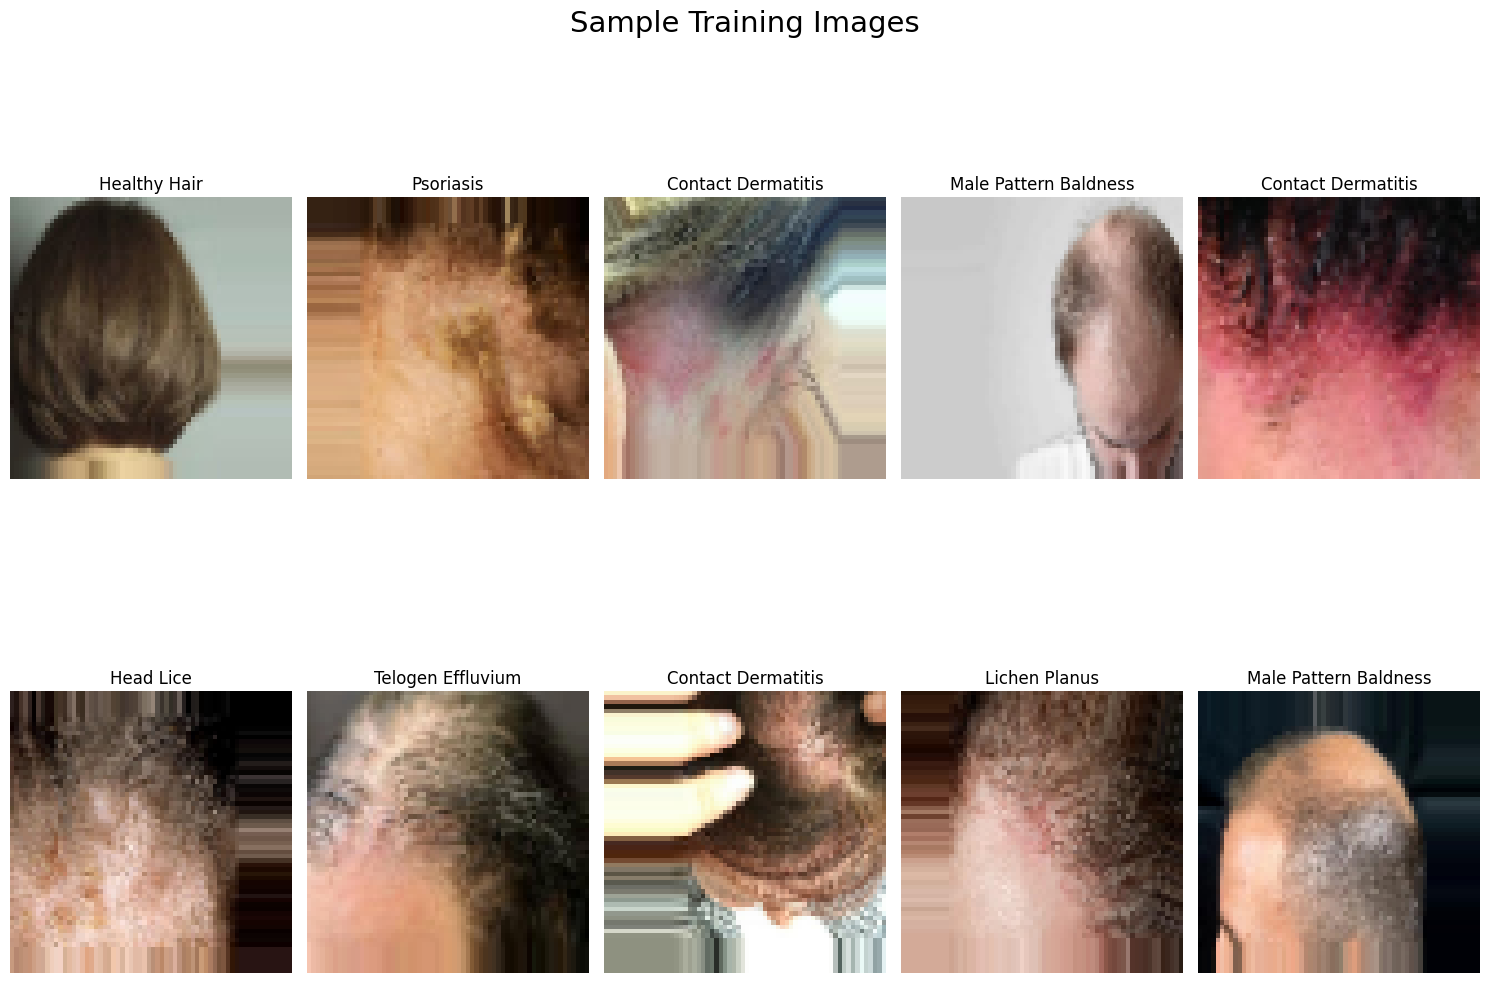

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [29]:
def model_create():
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(12, activation='softmax')
    ])
    return model

In [30]:
hay_model_cnn = model_create()
print(hay_model_cnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 128)       

In [31]:
optimizer = Adam(learning_rate=0.001)

In [32]:
hay_model_cnn.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [33]:
history = hay_model_cnn.fit(train_generator, epochs=100, validation_data=validation_generator, verbose=2)

Epoch 1/100
165/165 - 67s - loss: 2.2000 - accuracy: 0.2292 - val_loss: 2.0479 - val_accuracy: 0.3629 - 67s/epoch - 408ms/step
Epoch 2/100
165/165 - 46s - loss: 1.6750 - accuracy: 0.4211 - val_loss: 1.5120 - val_accuracy: 0.4928 - 46s/epoch - 276ms/step
Epoch 3/100
165/165 - 45s - loss: 1.3346 - accuracy: 0.5319 - val_loss: 1.2270 - val_accuracy: 0.5793 - 45s/epoch - 273ms/step
Epoch 4/100
165/165 - 48s - loss: 1.0709 - accuracy: 0.6280 - val_loss: 0.7852 - val_accuracy: 0.7563 - 48s/epoch - 288ms/step
Epoch 5/100
165/165 - 47s - loss: 0.8724 - accuracy: 0.7033 - val_loss: 1.0516 - val_accuracy: 0.6811 - 47s/epoch - 287ms/step
Epoch 6/100
165/165 - 47s - loss: 0.7310 - accuracy: 0.7581 - val_loss: 0.6055 - val_accuracy: 0.8178 - 47s/epoch - 283ms/step
Epoch 7/100
165/165 - 46s - loss: 0.6133 - accuracy: 0.8007 - val_loss: 0.8221 - val_accuracy: 0.7555 - 46s/epoch - 281ms/step
Epoch 8/100
165/165 - 46s - loss: 0.5131 - accuracy: 0.8334 - val_loss: 0.6877 - val_accuracy: 0.8147 - 46s/epo

In [34]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

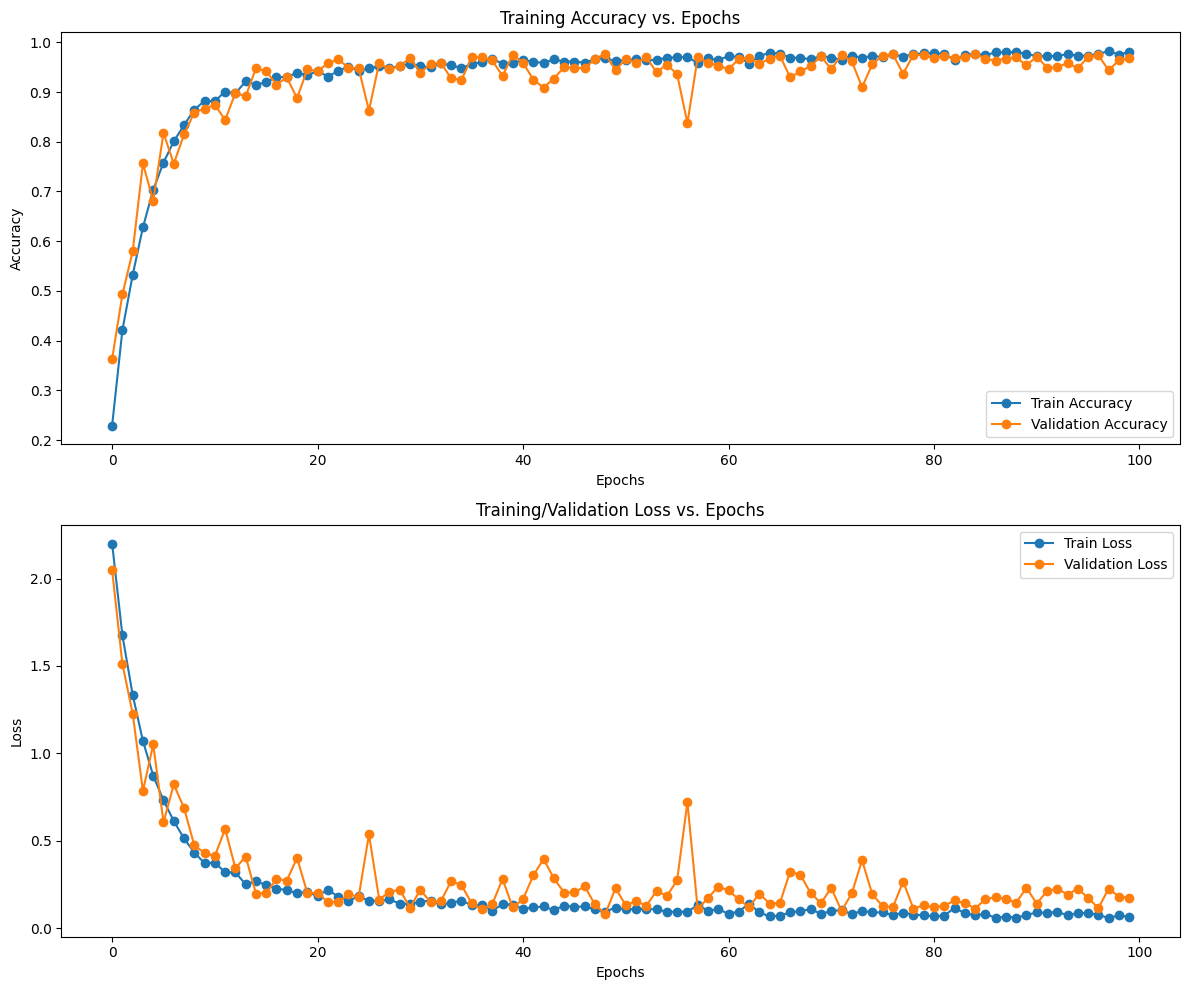

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [52]:
hay_model_cnn.save("hay_model.h5")

In [54]:
import tensorflow as tf

model = tf.keras.models.load_model('hay_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("hay_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\irfan\AppData\Local\Temp\tmp_l4qj7v3\assets


INFO:tensorflow:Assets written to: C:\Users\irfan\AppData\Local\Temp\tmp_l4qj7v3\assets


3682248

In [41]:
test_data = '/ML-MODEL/Hair Diseases - Final/test'

In [45]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_data,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (64,64),
                                                 class_mode='categorical')

Found 1269 images belonging to 12 classes.


In [46]:
prediction = hay_model_cnn.predict(test_generator)

20/20 [==============================] - 2s 121ms/step


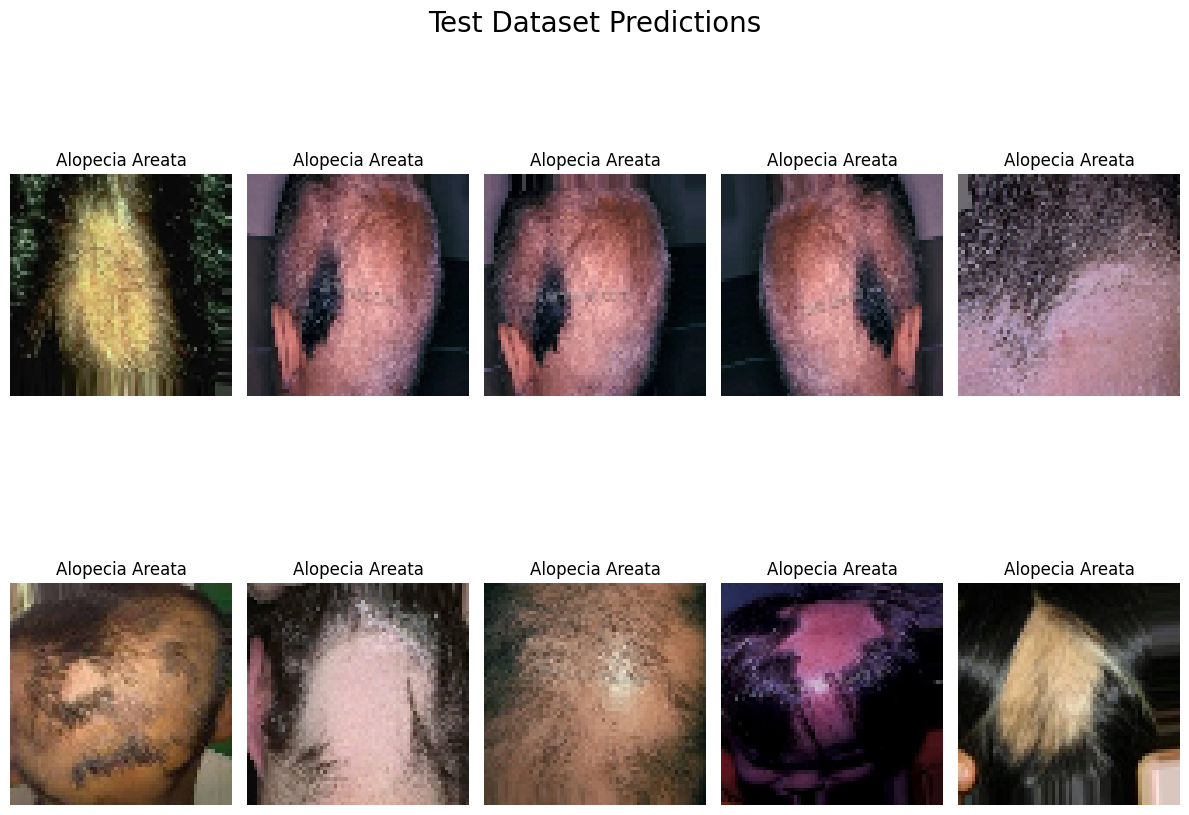

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(prediction[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [49]:
test_loss, test_accuracy = hay_model_cnn.evaluate(test_generator, batch_size=BATCH_SIZE)

20/20 [==============================] - 2s 123ms/step - loss: 0.1011 - accuracy: 0.9795


In [50]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.10114753991365433
Test Accuracy: 0.9795114398002625
